In [2]:
import cmocean.cm as cmo
from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from satpy import MultiScene
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

In [6]:
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/*MODIS_L2_aCDOM.nc')

cfile.sort()
ds = xr.open_dataset(cfile[1])
ds

<xarray.Dataset>
Dimensions:   (y: 380, x: 542, time: 35)
Coordinates:
  * y         (y) float64 2.816e+05 2.806e+05 ... -9.623e+04 -9.723e+04
  * x         (x) float64 -2.36e+05 -2.35e+05 -2.34e+05 ... 3.035e+05 3.045e+05
    lon       (y, x) float64 ...
    lat       (y, x) float64 ...
  * time      (time) datetime64[ns] 2021-10-22T18:15:00.881000 ... 2021-11-13...
Data variables: (12/15)
    Rrs_412   (time, y, x) float32 ...
    Rrs_443   (time, y, x) float32 ...
    Rrs_469   (time, y, x) float32 ...
    Rrs_488   (time, y, x) float32 ...
    Rrs_531   (time, y, x) float32 ...
    Rrs_547   (time, y, x) float32 ...
    ...        ...
    Rrs_678   (time, y, x) float32 ...
    aCDOM300  (time, y, x) float32 ...
    aCDOM355  (time, y, x) float32 ...
    S275_295  (time, y, x) float32 ...
    DOC       (time, y, x) float32 ...
    Mask      (time, y, x) float32 ...
Attributes: (12/48)
    title:                          MODISA Level-2 Data
    product_name:                   AQUA_MODIS.20211022T181500.L2.OC.nc
    processing_version:             R2022.0
    equatorCrossingLongitude:       99.259674
    orbit_number:                   103562
    history:                        l2gen par=/data3/sdpsoper/vdc/vpu2/workbu...
    ...                             ...
    geospatial_lon_max:             -85.944435
    geospatial_lon_min:             -87.995995
    startDirection:                 Ascending
    endDirection:                   Ascending
    day_night_flag:                 Day
    earth_sun_distance_correction:  1.0099461078643799

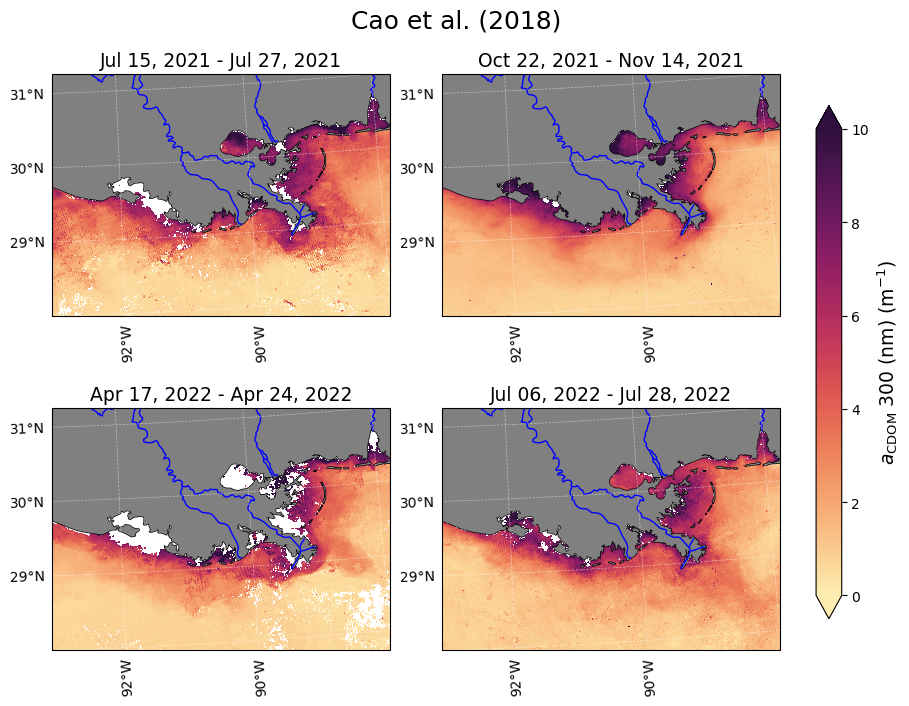

In [9]:
###300nm
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/*MODIS_L2_aCDOM.nc')
cfile.sort()

lat_top=31
lat_bot=28
lon_left=-93
lon_rigth=-88
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2, 2, constrained_layout=True, figsize=(9, 7),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        

title = ['Jul 15, 2021 - Jul 27, 2021', 'Oct 22, 2021 - Nov 14, 2021',  
         'Apr 17, 2022 - Apr 24, 2022', 'Jul 06, 2022 - Jul 28, 2022']


for i, ax in enumerate(axgr.flatten()):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.aCDOM300.mean('time')

        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=10, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap=cmo.matter)
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
        
        
    except:
        ax.remove()
        pass
    
fig.suptitle('Cao et al. (2018)', size=18)
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both')
cb.set_label('$a_{\mathrm{CDOM}}$ 300 (nm) (m$^{-1}$)', size=13.5)
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task5/CruiseAlg300.png')

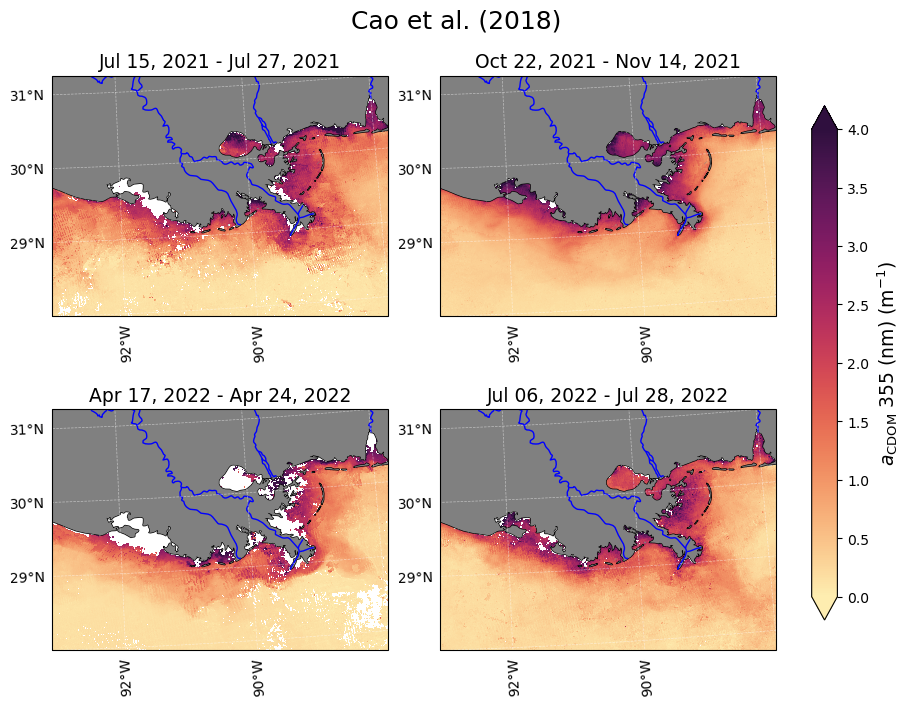

In [45]:
###355nm
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/*MODIS_L2_aCDOM.nc')
cfile.sort()

lat_top=31
lat_bot=28
lon_left=-93
lon_rigth=-88
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2, 2, constrained_layout=True, figsize=(9, 7),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        

title = ['Jul 15, 2021 - Jul 27, 2021', 'Oct 22, 2021 - Nov 14, 2021',  
         'Apr 17, 2022 - Apr 24, 2022', 'Jul 06, 2022 - Jul 28, 2022']


for i, ax in enumerate(axgr.flatten()):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.aCDOM355.mean('time')

        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=4, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap=cmo.matter)
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
        
        
    except:
        ax.remove()
        pass
    
fig.suptitle('Cao et al. (2018)', size=18)
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both')
cb.set_label('$a_{\mathrm{CDOM}}$ 355 (nm) (m$^{-1}$)', size=13.5)
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task5/CruiseAlg355.png')

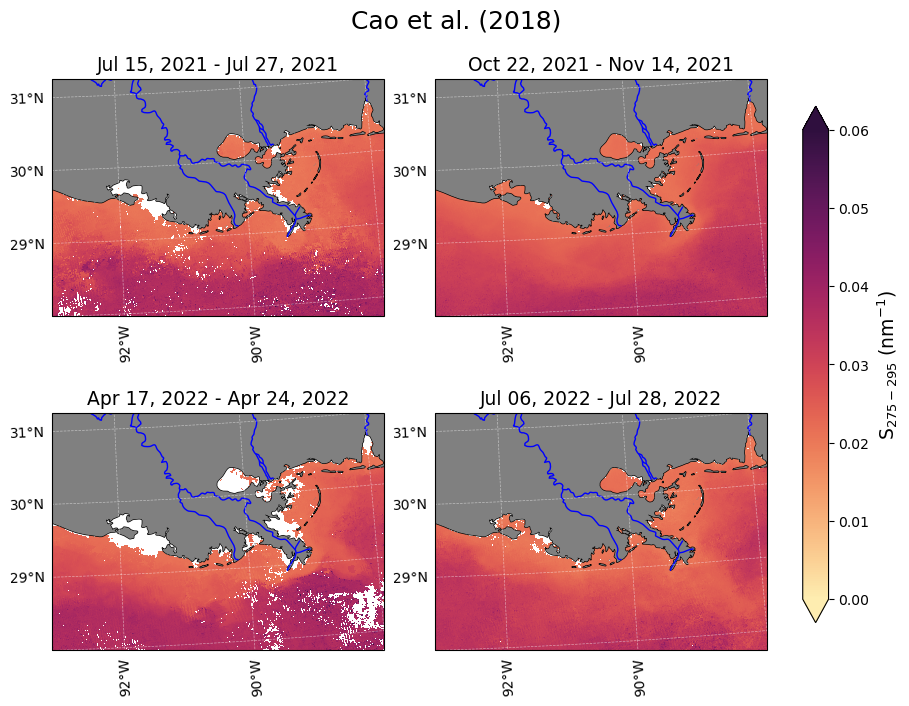

In [53]:
###S275-295
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/*MODIS_L2_aCDOM.nc')
cfile.sort()

lat_top=31
lat_bot=28
lon_left=-93
lon_rigth=-88
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2, 2, constrained_layout=True, figsize=(9, 7),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        

title = ['Jul 15, 2021 - Jul 27, 2021', 'Oct 22, 2021 - Nov 14, 2021',  
         'Apr 17, 2022 - Apr 24, 2022', 'Jul 06, 2022 - Jul 28, 2022']


for i, ax in enumerate(axgr.flatten()):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.S275_295.mean('time')

        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=.06, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap=cmo.matter)
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
        
        
    except:
        ax.remove()
        pass
    
fig.suptitle('Cao et al. (2018)', size=18)
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both')
cb.set_label('S$_{275-295}$ (nm$^{-1}$)', size=13.5)
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task5/CruiseAlgS275_295.png')

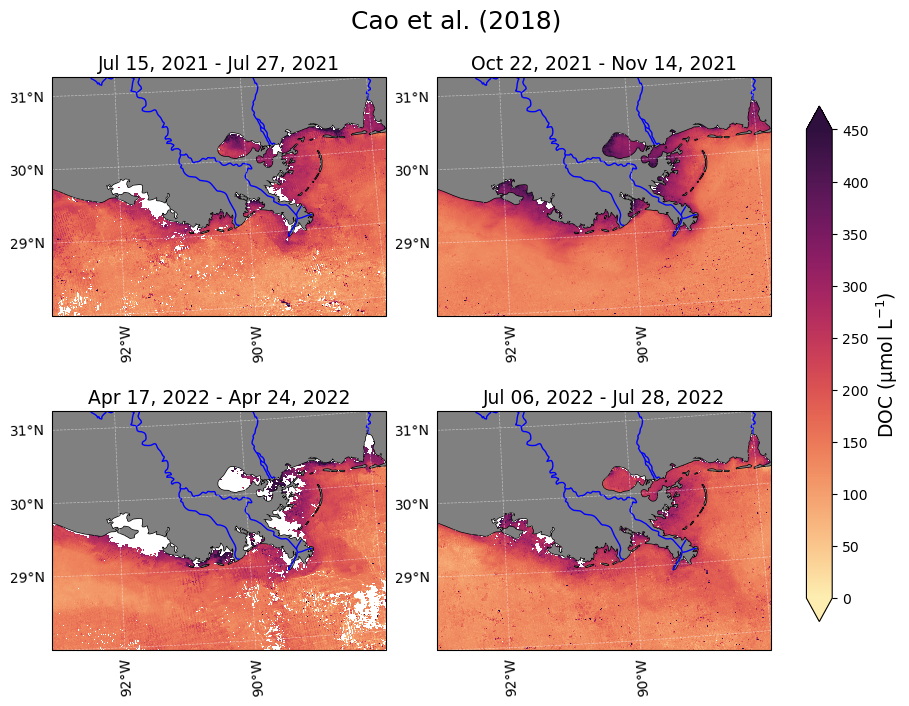

In [46]:
###DOC
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Task2/CruiseaCDOM/*MODIS_L2_aCDOM.nc')
cfile.sort()

lat_top=31
lat_bot=28
lon_left=-93
lon_rigth=-88
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2, 2, constrained_layout=True, figsize=(9, 7),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        

title = ['Jul 15, 2021 - Jul 27, 2021', 'Oct 22, 2021 - Nov 14, 2021',  
         'Apr 17, 2022 - Apr 24, 2022', 'Jul 06, 2022 - Jul 28, 2022']


for i, ax in enumerate(axgr.flatten()):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.DOC.mean('time')

        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=450, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap=cmo.matter)
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
        
        
    except:
        ax.remove()
        pass
    
fig.suptitle('Cao et al. (2018)', size=18)
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both')
cb.set_label(u'DOC (\u03bcmol L$^{-1}$)', size=13.5)
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task5/CruiseAlgDOC.png')